In [82]:
import matplotlib.pyplot as plt
import matplotlib as mpl # logscale plots
from shapely import wkt # convert geometry objects
import geopandas as gpd
import pandas as pd
import numpy as np

In [83]:
save = True # save figures
present = True # format figures for a presentation and save in the presetnation folderT
TABLE_GRAPH_WIDTH = 3

if present:
    plt.style.use('metropolis')
    save_folder = 'presentation'
else:
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })
    save_folder = 'paper'

In [84]:
## read files
nodes = pd.read_csv('data/utilization_stats/node_stats.csv') # node files (data to analyze)
nodes['node'] = nodes['node'].astype(str)
nodes['geometry'] = nodes['geometry'].apply(wkt.loads)
nodes = gpd.GeoDataFrame(nodes) # make plots easier

# differences
nodes['betweenness_diff'] = nodes['betweenness_wo_bridge'] - nodes['betweenness_w_bridge']

tracts = pd.read_csv('data/utilization_stats/tract_stats.csv')
tracts['geometry'] = tracts['geometry'].apply(wkt.loads)
tracts = gpd.GeoDataFrame(tracts) # make plots easier

# differecnes
tracts['closeness_diff'] = tracts['closeness_wo_bridge'] - tracts['closeness_w_bridge']
tracts['straightness_diff'] = tracts['straightness_wo_bridge'] - tracts['straightness_w_bridge']

edges = pd.read_csv('data/network/BMA_roads.csv') # edge files (mainly for plots)
edges['u'], edges['v'] = edges['u'].astype(str), edges['v'].astype(str)
edges['geometry'] = edges['geometry'].apply(wkt.loads)
edges = gpd.GeoDataFrame(edges) # make plots easier

us_states = gpd.read_file('data/utilization/cb_2022_us_state_500k/cb_2022_us_state_500k.shp').to_crs('EPSG:2893')

/var/folders/7l/ffzd6jqd4k1g060d9whf4v2c0000gn/T/ipykernel_4476/2858647572.py:18: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  edges = pd.read_csv('data/network/BMA_roads.csv') # edge files (mainly for plots)


Number of Nodes Excluded: 57352
Number of Nodes Included: 33948


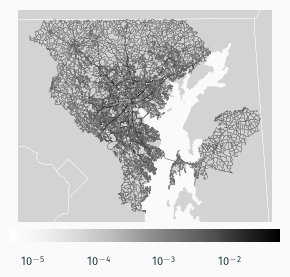

In [85]:
## map of the network betweenness w bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# roads that weren't destroyed
edges.plot(
    color='dimgray',
    linewidth=0.25,
    zorder=5,
    ax=ax
)

# intersections
nodes.plot(
    column='betweenness_w_bridge',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    norm=mpl.colors.LogNorm(vmin=nodes[nodes['betweenness_w_bridge'] > 0]['betweenness_w_bridge'].min(), vmax=nodes['betweenness_w_bridge'].max()), # logscale it
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_betweenness_w_bridge.png', dpi=400, bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file

# logscale effect
print(f'Number of Nodes Excluded: {nodes[nodes['betweenness_w_bridge'] <= 0]['betweenness_w_bridge'].count()}')
print(f'Number of Nodes Included: {nodes[nodes['betweenness_w_bridge'] > 0]['betweenness_w_bridge'].count()}')

Number of Nodes Excluded: 57392
Number of Nodes Included: 33908


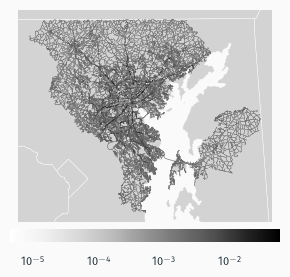

In [86]:
## map of the network betweenness w bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# roads that weren't destroyed
edges.plot(
    color='dimgray',
    linewidth=0.25,
    zorder=5,
    ax=ax
)

# intersections
nodes.plot(
    column='betweenness_wo_bridge',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    norm=mpl.colors.LogNorm(vmin=nodes[nodes['betweenness_wo_bridge'] > 0]['betweenness_wo_bridge'].min(), vmax=nodes['betweenness_w_bridge'].max()), # logscale it
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_betweenness_wo_bridge.png', dpi=400, bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file

# logscale effect
print(f'Number of Nodes Excluded: {nodes[nodes['betweenness_wo_bridge'] <= 0]['betweenness_wo_bridge'].count()}')
print(f'Number of Nodes Included: {nodes[nodes['betweenness_wo_bridge'] > 0]['betweenness_wo_bridge'].count()}')

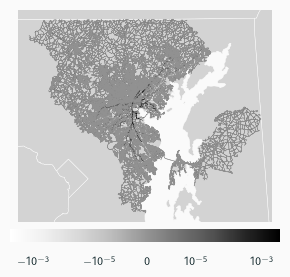

In [87]:
## map of the network betweenness diff
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# roads that weren't destroyed
edges.plot(
    color='dimgray',
    linewidth=0.25,
    zorder=5,
    ax=ax
)

# intersections
norm = mpl.colors.SymLogNorm(np.abs(nodes[nodes['betweenness_diff'] > 0]['betweenness_diff']).min(), vmin=nodes['betweenness_diff'].min(), vmax=nodes['betweenness_diff'].max())
nodes.plot(
    column='betweenness_diff',
    # cmap='viridis_r',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9,
        'ticks': [-1.e-03, -1.e-05, 0.e+00, 1.e-05, 1.e-03] # specify to avoid overlap
    },
    norm=norm, # logscale it
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
res = us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_betweenness_diff.png', dpi=400, bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file


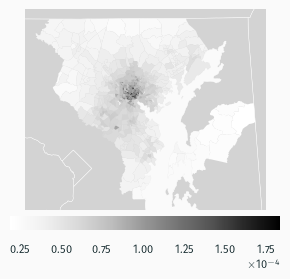

In [88]:
## closeness w bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# intersections
tracts[tracts['closeness_w_bridge'] != 0].plot(
    column='closeness_w_bridge',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9,
    },
    ax=ax
)
formatter = mpl.ticker.ScalarFormatter() # scientific notation
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
fig.get_axes()[1].xaxis.set_major_formatter(formatter)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_closeness_w_bridge.pdf', bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file

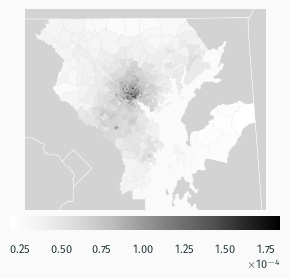

In [89]:
## map of the network closeness wo bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# intersections
tracts[tracts['closeness_wo_bridge'] != 0].plot(
    column='closeness_wo_bridge',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    ax=ax
)
formatter = mpl.ticker.ScalarFormatter() # scientific notation
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
fig.get_axes()[1].xaxis.set_major_formatter(formatter)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_closeness_wo_bridge.pdf', bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file

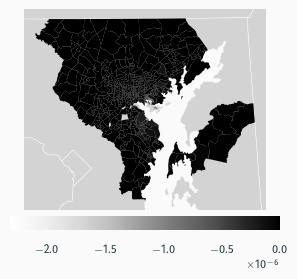

In [90]:
## map of the difference in network closeness w bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# intersections
tracts[tracts['closeness_w_bridge'] != 0].plot(
    column='closeness_diff',
    # cmap='viridis_r',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_closeness_diff.pdf', bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file

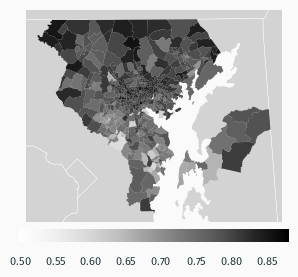

In [91]:
## map of the network straightness w bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# intersections
tracts[tracts['straightness_w_bridge'] > 0].plot(
    column='straightness_w_bridge',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_straightness_w_bridge.pdf', bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file

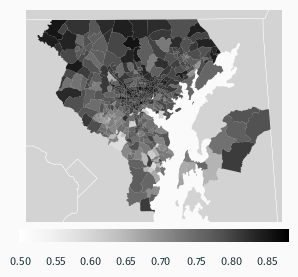

In [92]:
## map of the network straightness w bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# intersections
tracts[tracts['straightness_wo_bridge'] != 0].plot(
    column='straightness_wo_bridge',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_straightness_wo_bridge.pdf', bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file

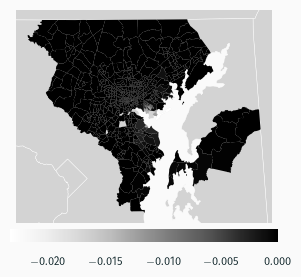

In [93]:
## map of the network straightness w bridge
fig, ax = plt.subplots()
fig.set_figwidth(TABLE_GRAPH_WIDTH) # page width
ax.set_aspect('equal')
ax.axis('off')

# intersections
tracts[tracts['straightness_wo_bridge'] != 0].plot(
    column='straightness_diff',
    markersize=0.05,
    zorder=10,
    legend=True,
    legend_kwds={
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/use_straightness_diff.pdf', bbox_inches='tight', pad_inches=0) # us png not pdf bc its a really big file